In [8]:
import os
# os.environ['COMETS_GLOP'] = '/Users/rishishah/cs/BU/SAIL/comets-api/comets_glop'
os.environ['COMETS_GLOP'] = './comets_glop'

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import cometspy as c
import cobra

# This script is for setting up, running, and saving the results from a
# COMETS simulation
# The simulation is for the E. coli core model, in a well-mixed
# environment with glucose and oxygen

In [10]:
# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose
test_tube.set_specific_metabolite('glc__D_e', 0.011)

# Add plenty of oxygen
test_tube.set_specific_metabolite('o2_e', 1000)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e', 1000)
test_tube.set_specific_metabolite('pi_e', 1000)
test_tube.set_specific_metabolite('h2o_e', 1000)
test_tube.set_specific_metabolite('h_e', 1000)

building empty layout model
models will need to be added with layout.add_model()


In [11]:
# create the model using CobraPy functionality
e_coli_cobra = cobra.io.load_model('textbook')

# use the loaded model to build a comets model
e_coli = c.model(e_coli_cobra)

# remove the bounds from glucose import (will be set dynamically by COMETS)
e_coli.change_bounds('EX_glc__D_e', -1000, 1000)
e_coli.change_bounds('EX_ac_e', -1000, 1000)

# set the model's initial biomass
e_coli.initial_pop = [0, 0, 5e-6]

# add it to the test_tube
test_tube.add_model(e_coli)

In [12]:
# Set the parameters that are different from the default
sim_params = c.params()

sim_params.set_param('defaultVmax', 18.5)
sim_params.set_param('defaultKm', 0.000015)
sim_params.set_param('maxCycles', 600)
sim_params.set_param('timeStep', 0.01)
sim_params.set_param('spaceWidth', 1)
sim_params.set_param('maxSpaceBiomass', 10)
sim_params.set_param('minSpaceBiomass', 1e-11)
sim_params.set_param('writeMediaLog', True)
sim_params.set_param('writeFluxLog', True)
sim_params.set_param('FluxLogRate', 1)



These are the expected locations for dependencies:
Dependency 			 expected path
__________ 			 _____________
or-tools			./comets_glop/lib/or-tools/jna-5.12.1.jar:./comets_glop/lib/or-tools/protobuf-java-2.5.0.jar:./comets_glop/lib/or-tools/jna-jpms-5.12.1.jar:./comets_glop/lib/or-tools/jna-platform-5.12.1.jar:./comets_glop/lib/or-tools/jna-platform-jpms-5.12.1.jar
or-tools-arm64			./comets_glop/or-tools/arm64/ortools-java-9.7.2996-javadoc.jar:./comets_glop/or-tools/arm64/ortools-java-9.7.2996-sources.jar:./comets_glop/or-tools/arm64/ortools-darwin-aarch64-9.7.2996-sources.jar:./comets_glop/or-tools/arm64/ortools-darwin-aarch64-9.7.2996.jar:./comets_glop/or-tools/arm64/ortools-java-9.7.2996.jar

  You have two options to fix this problem:
1.  set each class path correctly by doing:
    comets.set_classpath(libraryname, path)
    e.g.   comets.set_classpath('hamcrest', '/home/chaco001/comets/junit/hamcrest-core-1.3.jar')

    note that versions dont always have to exactly match, but you'

Text(0, 0.5, 'Biomass (gr.)')

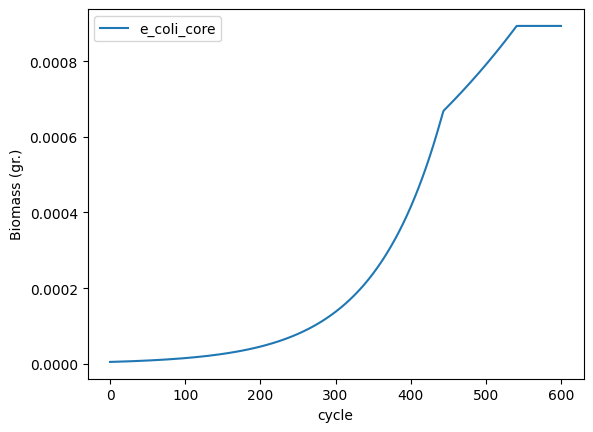

In [13]:
# Create the experiment
experiment = c.comets(test_tube, sim_params)

# Run the simulation
experiment.run()

# Plot
ax = experiment.total_biomass.plot(x = 'cycle')
ax.set_ylabel("Biomass (gr.)")